In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import matplotlib

In [2]:
nasdaq = pd.read_csv("/kaggle/input/nasdaq/NQ_continuous_adjusted_1min_2011_2018.txt", sep=",")

In [3]:
nasdaq

,DateTime,Open,High,Low,Close,Volume
0,2011-01-02 18:00:00,2361.25,2364.25,2361.25,2364.00,169
1,2011-01-02 18:01:00,2363.25,2364.00,2363.25,2363.50,10
2,2011-01-02 18:02:00,2363.50,2364.50,2363.25,2364.50,71
3,2011-01-02 18:03:00,2364.75,2364.75,2364.00,2364.25,70
4,2011-01-02 18:04:00,2364.50,2365.00,2364.25,2364.25,30
...,...,...,...,...,...,...
2611964,2018-12-31 16:55:00,6489.75,6491.50,6489.75,6491.50,19
2611965,2018-12-31 16:56:00,6491.50,6492.25,6491.00,6491.50,61
2611966,2018-12-31 16:57:00,6491.50,6492.25,6490.75,6490.75,17
2611967,2018-12-31 16:58:00,6491.00,6491.50,6491.00,6491.25,29


<Axes: >

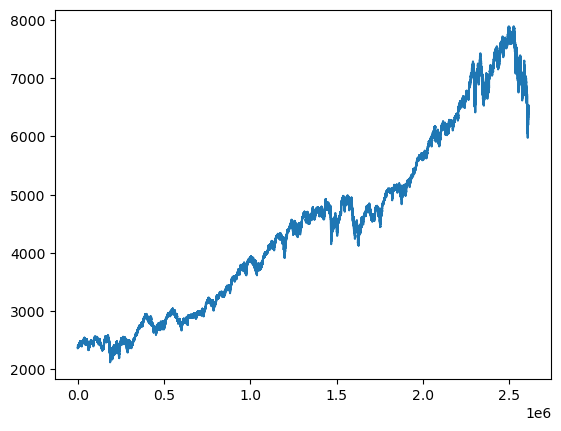

In [4]:
nasdaq['Close'].plot()

In [5]:
output_var = pd.DataFrame(nasdaq['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(nasdaq[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=nasdaq.index)
feature_transform.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Open,High,Low,Volume
0,0.041594,0.041979,0.041903,0.009501
1,0.041941,0.041936,0.042250,0.000509
2,0.041984,0.042022,0.042250,0.003959
3,0.042201,0.042066,0.042380,0.003902
4,0.042158,0.042109,0.042423,0.001640


In [7]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [8]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

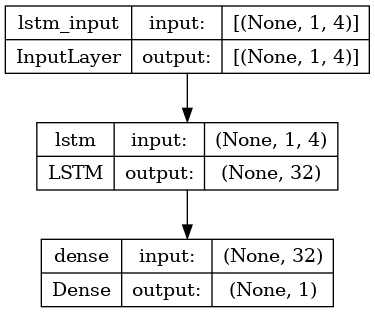

In [10]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [11]:
history=lstm.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, shuffle=False)

Epoch 1/10
18551/18551 [==============================] - 120s 6ms/step - loss: 2198479.7500
Epoch 2/10
18551/18551 [==============================] - 109s 6ms/step - loss: 552.5355
Epoch 3/10
18551/18551 [==============================] - 110s 6ms/step - loss: 75.7907
Epoch 4/10
18551/18551 [==============================] - 110s 6ms/step - loss: 25.4385
Epoch 5/10
18551/18551 [==============================] - 109s 6ms/step - loss: 8.6009
Epoch 6/10
18551/18551 [==============================] - 111s 6ms/step - loss: 3.1409
Epoch 7/10
18551/18551 [==============================] - 109s 6ms/step - loss: 1.4417
Epoch 8/10
18551/18551 [==============================] - 112s 6ms/step - loss: 0.8707
Epoch 9/10
18551/18551 [==============================] - 110s 6ms/step - loss: 0.6662
Epoch 10/10
18551/18551 [==============================] - 110s 6ms/step - loss: 0.6026


In [12]:
y_pred= lstm.predict(X_test)

7421/7421 [==============================] - 14s 2ms/step


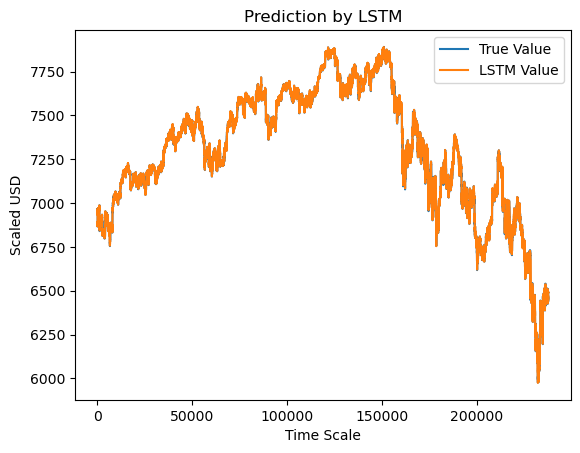

In [13]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()